# 任务4 用户价值分析 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 读取预处理后的会员信息表与销售流水表的合并表
whole = pd.read_csv('temp/task1.csv')

labels = pd.read_csv('temp/label.csv')

# 去除非会员订单，以及无购买记录的会员记录
whole2 = whole.dropna(axis = 0,subset = ['kh','djsj','dtime'])

khs = list(set(whole2['kh']))

/home/linux/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 将日期转换为datetime格式
whole2['dtime'] = pd.to_datetime(whole2['dtime'])
whole2['csrq'] = pd.to_datetime(whole2['csrq'])
whole2['djsj'] = pd.to_datetime(whole2['djsj'])

/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [5]:
labels.head()

,Unnamed: 0,kh,xb,rhsc,nl,jf,xfsp,gwspph,jjph,xfpc
0,0,568e4582,568e4582,1174,26,630.0,630.0,['科颜氏柜'],冬季,2
1,1,1d265aca,1d265aca,3341,50,186.0,186.0,['Aimer Kids'],夏季,1
2,2,9170176a,9170176a,3029,36,1156.0,1156.0,"['茜子柜', 'Triumph', 'YSL']",春季,3
3,3,0b938ec0,0b938ec0,1098,51,704.0,704.0,['宝岛眼镜'],夏季,1
4,4,2f076d42,2f076d42,1447,43,6021.0,6031.0,"['HAILIVES', 'Ecco柜', 'Insun柜']",春季,3


In [12]:
# 从标签信息中，提取消费频次，入会时长和消费金额特征
rhscs = labels['rhsc'].values
xfsps = labels['xfsp'].values
xfpcs = labels['xfpc'].values

In [8]:
# 最近消费特征，以距离2015年的天数记，数值越大说明越是最近有消费

zjxfs = []

for kh in khs:
    order = whole2[whole2['kh'] == kh]
    zjxf = np.max(order['dtime'] - pd.to_datetime('2015-1-1')).days   

    zjxfs.append(zjxf)

In [13]:
fea = pd.DataFrame()
fea['rhsc'] = rhscs
fea['xfsp'] = xfsps
fea['sfpc'] = xfpcs
fea['zjxf'] = zjxfs

In [14]:
fea.to_csv('features.csv')

In [20]:
fea.describe()

,rhsc,xfsp,sfpc,zjxf
count,31361.000000,3.136100e+04,31361.000000,31361.000000
mean,1679.229170,1.844931e+04,5.659577,674.869456
std,1167.199552,5.213320e+04,10.064520,376.752897
min,1.000000,0.000000e+00,1.000000,0.000000
25%,861.000000,1.865000e+03,1.000000,231.000000
50%,1415.000000,5.263000e+03,2.000000,783.000000
75%,2466.000000,1.559840e+04,6.000000,1026.000000
max,5552.000000,3.281898e+06,223.000000,1098.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
stand = StandardScaler().fit(fea)

fea2 = stand.transform(fea)

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score
for i in range(3,8):
    kmeans = KMeans(n_clusters = i, random_state = 123).fit(fea2)
    score = calinski_harabaz_score(fea2,kmeans.labels_)
    print('数据聚类%d类calinski_harabaz指数为:%f'%(i,score))

数据聚类3类calinski_harabaz指数为:12683.256564
数据聚类4类calinski_harabaz指数为:13945.159142
数据聚类5类calinski_harabaz指数为:14581.140570
数据聚类6类calinski_harabaz指数为:14436.806553
数据聚类7类calinski_harabaz指数为:14293.851320


In [32]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(fea2)
pred = kmeans.predict(fea2)

In [33]:
fea[pred == 0].describe()

,rhsc,xfsp,sfpc,zjxf
count,12847.000000,12847.000000,12847.000000,12847.000000
mean,953.882229,10707.231718,3.737526,909.383747
std,562.124431,14838.959911,3.921570,173.574963
min,1.000000,0.000000,1.000000,443.000000
25%,524.000000,1779.500000,1.000000,776.000000
50%,975.000000,4900.000000,2.000000,966.000000
75%,1366.000000,13080.650000,5.000000,1061.000000
max,2098.000000,145534.000000,24.000000,1098.000000


In [34]:
fea[pred == 1].describe()

,rhsc,xfsp,sfpc,zjxf
count,1630.000000,1630.000000,1630.000000,1630.000000
mean,1266.473006,118880.208067,31.653374,698.093252
std,959.090480,65835.417363,13.193864,355.460683
min,5.000000,13421.400000,1.000000,0.000000
25%,553.000000,70301.800000,23.000000,460.250000
50%,953.500000,103530.790000,29.000000,793.000000
75%,1759.500000,152424.865000,38.000000,1014.750000
max,5538.000000,384690.980000,108.000000,1098.000000


In [35]:
fea[pred == 2].describe()

,rhsc,xfsp,sfpc,zjxf
count,8842.000000,8842.000000,8842.000000,8842.000000
mean,1523.208324,10742.986830,3.854897,174.759444
std,941.490202,15087.180357,4.139722,143.423565
min,1.000000,0.000000,1.000000,0.000000
25%,883.250000,1782.000000,1.000000,67.000000
50%,1351.500000,4786.000000,2.000000,139.000000
75%,2222.000000,13045.970000,5.000000,214.000000
max,4342.000000,151191.000000,29.000000,596.000000


In [36]:
fea[pred == 3].describe()

,rhsc,xfsp,sfpc,zjxf
count,7886.000000,7886.000000,7886.000000,7886.000000
mean,3130.238524,9414.426523,3.859751,848.606137
std,819.684608,13018.608570,4.149228,251.618111
min,1975.000000,0.000000,1.000000,0.000000
25%,2476.000000,1616.000000,1.000000,712.000000
50%,2986.500000,4289.500000,2.000000,926.500000
75%,3340.000000,11484.800000,5.000000,1060.000000
max,5552.000000,119866.400000,36.000000,1098.000000


In [37]:
fea[pred == 4].describe()

,rhsc,xfsp,sfpc,zjxf
count,156.000000,1.560000e+02,156.000000,156.000000
mean,1218.980769,5.001705e+05,85.615385,682.724359
std,959.926102,3.351855e+05,36.610850,363.249076
min,17.000000,1.976804e+05,4.000000,10.000000
25%,585.000000,3.301002e+05,63.000000,451.250000
50%,883.000000,4.071628e+05,77.000000,797.000000
75%,1616.000000,5.154062e+05,102.250000,1004.750000
max,4453.000000,3.281898e+06,223.000000,1096.000000


[0.         1.57079633 3.14159265 4.71238898 0.        ] [-0.62146752 -0.14878    -0.19139413  0.62247144 -0.62146752]
[0.         1.57079633 3.14159265 4.71238898 0.        ] [-0.35314166  1.92350442  2.5802267   0.0623831  -0.35314166]
[0.         1.57079633 3.14159265 4.71238898 0.        ] [-0.13386305 -0.14781984 -0.17949375 -1.3273256  -0.13386305]
[0.         1.57079633 3.14159265 4.71238898 0.        ] [ 1.2431743  -0.17330659 -0.17883162  0.46114961  1.2431743 ]
[0.         1.57079633 3.14159265 4.71238898 0.        ] [-0.39432481  9.24034709  7.94445043  0.02084928 -0.39432481]


/home/linux/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


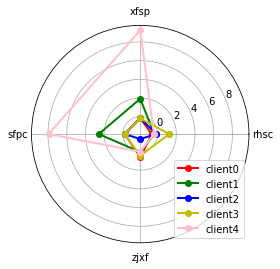

In [43]:
labels = fea.columns
k = 5
plot_data = kmeans.cluster_centers_
color = ['r','g','b','y','pink']

#angles = np.linspace(0, 2*np.pi, k, endpoint=False)

#plot_data = kmeans.cluster_centers_

# 闭合
#plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 
# 闭合
#angles = np.concatenate((angles, [angles[0]])) 

import matplotlib.pyplot as plt
angles = np.linspace(0, 2*np.pi, k-1, endpoint=False)
# 闭合
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 
# 闭合
angles = np.concatenate((angles, [angles[0]])) 

fig = plt.figure()
#polar参数
ax = fig.add_subplot(111, polar=True) 
for i in range(len(plot_data)):
    print(angles,plot_data[i])
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'client'+str(i), linewidth=2)


#ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
plt.legend(loc = 4)
plt.show()

client0：最近有消费，入会时间不长，消费水平和消费频次都不高，应为新会员

client1：消费水平和消费频次都很高，最近消费距离较长

client2：消费水平和消费频次都低，且最近消费距离时间最长，为流失客户

client3：入会时间长，消费水平和消费频次低，但最近有消费，挽留客户

client4：消费水平和消费金额远远高于别的客户，且最近有消费，铁杆客户